In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# 그래프 범례 한글 깨짐 방지

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('credit_card_data.csv')

In [14]:
# 지역정보를 제외하고, 성별정보를 담고있는 데이터프레임
data_by_sex = df[df.pop_cd.str[0]=='Y']

# 성별정보를 제외하고, 지역정보를 담고있는 데이터프레임
data_by_loc = df[df.pop_cd.str[0]=='L']

### 전체 컬럼의 상관관계
* 신용등급과 신용점수는 <br>
총 대출약정금액(monthly_lc), 총 대출액(monthly_loan),
은행대출금액(monthly_bk_loan), 저축은행대출금액(monthly_sbk_loan), 
한도대출 총약정금액(loan_commitment), 일시상환대출 총잔액(ls_rep_loanb), 
담보대출 총액(morgage_loan) 을 제외한 나머지 컬럼과는 연관성이 적다(0.6이하)
* 월별 카드 이용금액은 <br>
신용점수(avg_score), 총대출약정금액(mothly_lc), 총대출액(monthly_loan), 은행대출액(monthly_bk_loan),저축은행대출액(monthly_sbk_loan), 
한도대출 총약정액(loan_commitment), 일시상환대출잔액(ls_rep_loanb), 담보대출총합(mortagage_loan)과 연관성이 적다(0.6이하)

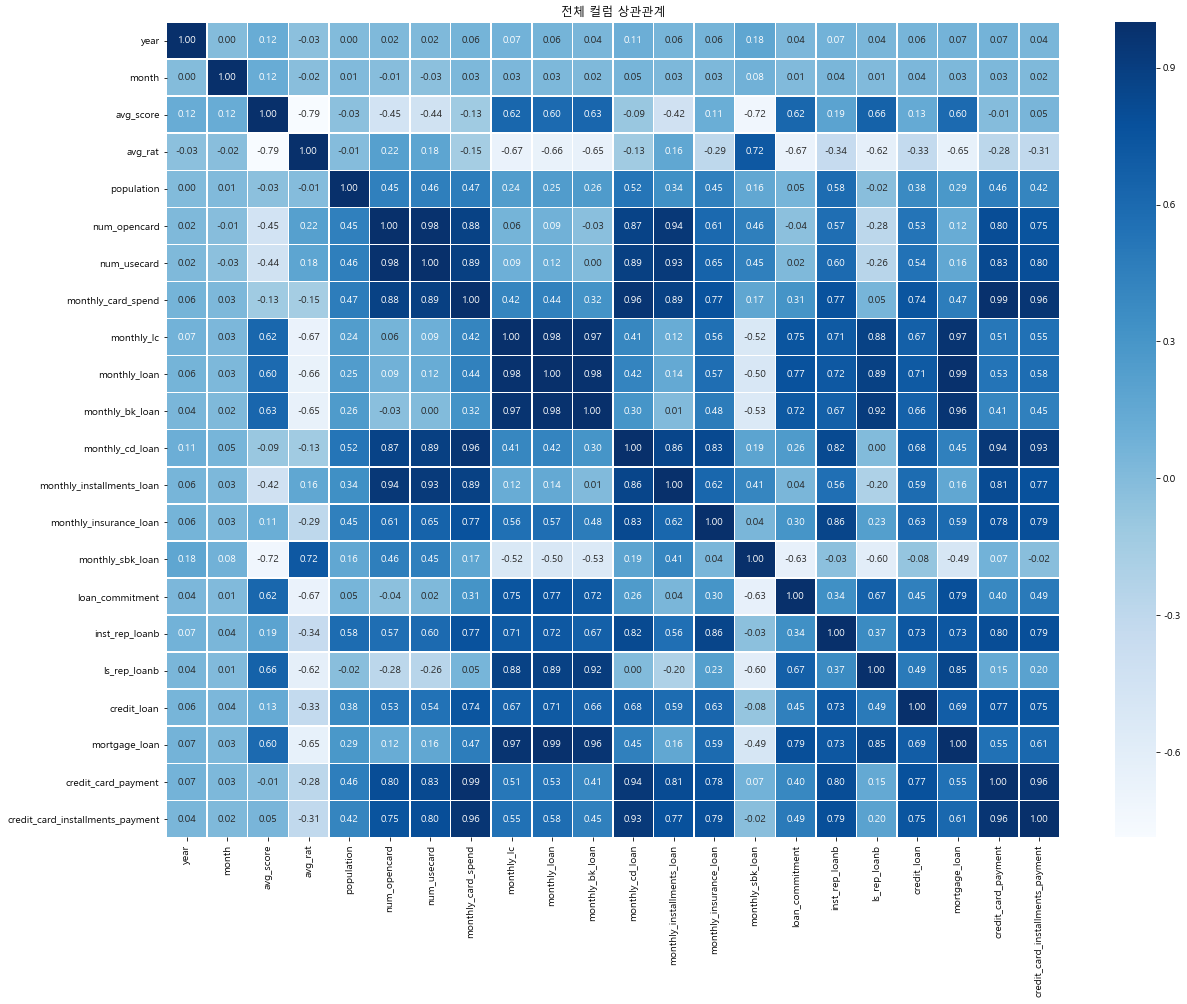

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(data=data_by_loc.corr(), annot=True,
           fmt='.2f', linewidths=.5, cmap='Blues')
plt.title('전체 컬럼 상관관계')
plt.show()

### 신용등급 예측에 대한 정확도 그래프
* 신용점수 또는 신용등급과 연관성이 낮은 지표들끼리 머신러닝을 통해 학습시켰더니<br> 0.9이상의 확률로 
신용점수 또는 신용등급을 예측할 수 있다.<br>
* 월별 카드사용액(monthly_card_spend)으로 신용등급(avg_rat)을 예측하기가 가장 어렵다.

In [9]:
import itertools
lst = ['num_opencard', 'num_usecard', 'monthly_card_spend', 
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'inst_rep_loanb', 'ls_rep_loanb', 
       'credit_loan', 'credit_card_payment', 'credit_card_installments_payment']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)

In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings(action='ignore')
accuracy_score_list=[]

for i in range(len(combs)):
    y = data_by_loc.avg_rat
    X = data_by_loc[combs[i]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    rfc = RandomForestClassifier(n_estimators=600)
    rfc.fit(X_train, y_train)
    predictions = rfc.predict(X_test)
    accuracy_score_list.append(accuracy_score(y_test, predictions))

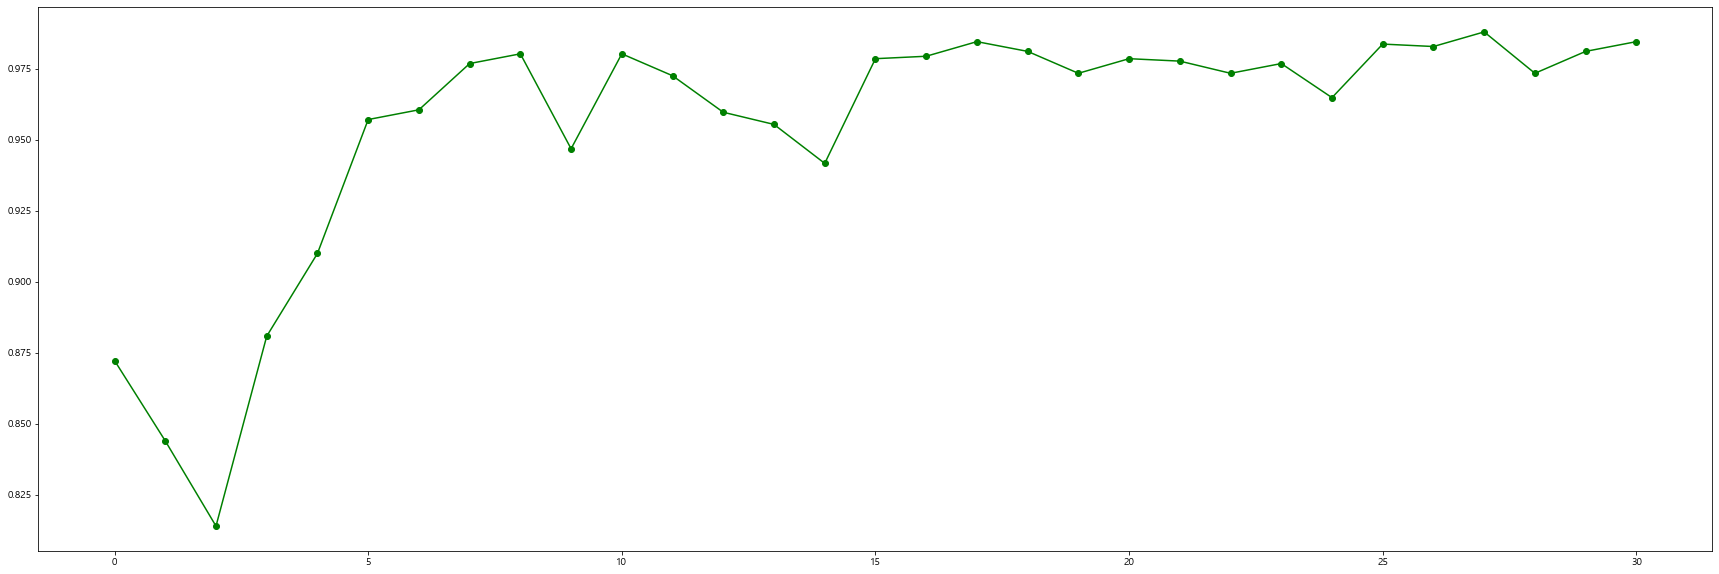

In [11]:
plt.figure(figsize=(30,10))
plt.plot(accuracy_score_list,color='green',marker='o',linestyle='solid')
plt.show()

### 신용점수 예측에 대한 오차 그래프
* 칼럼이 한두개 일 때는 예측에 대한 오차가 크지만<br>
두 개 이상의 칼럼이 결합되었을 때는 예측에 대한 오차가 적어진다.<br>
* 하지만 [보험업종대출과 분할상환대출잔액], [카드업종대출과 보험업종대출], [월카드이용금액, 카드업종대출] 이 결합하였을 때 예측 오차가 가장 크다.

In [14]:
import itertools
lst = ['num_opencard', 'num_usecard', 'monthly_card_spend', 
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'inst_rep_loanb', 'ls_rep_loanb', 
       'credit_loan', 'credit_card_payment', 'credit_card_installments_payment']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)

In [15]:
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action='ignore')
rmse_list=[]

for i in range(len(combs)):
    y = data_by_loc.avg_score
    X = data_by_loc[combs[i]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse_list.append( np.sqrt(mse) )

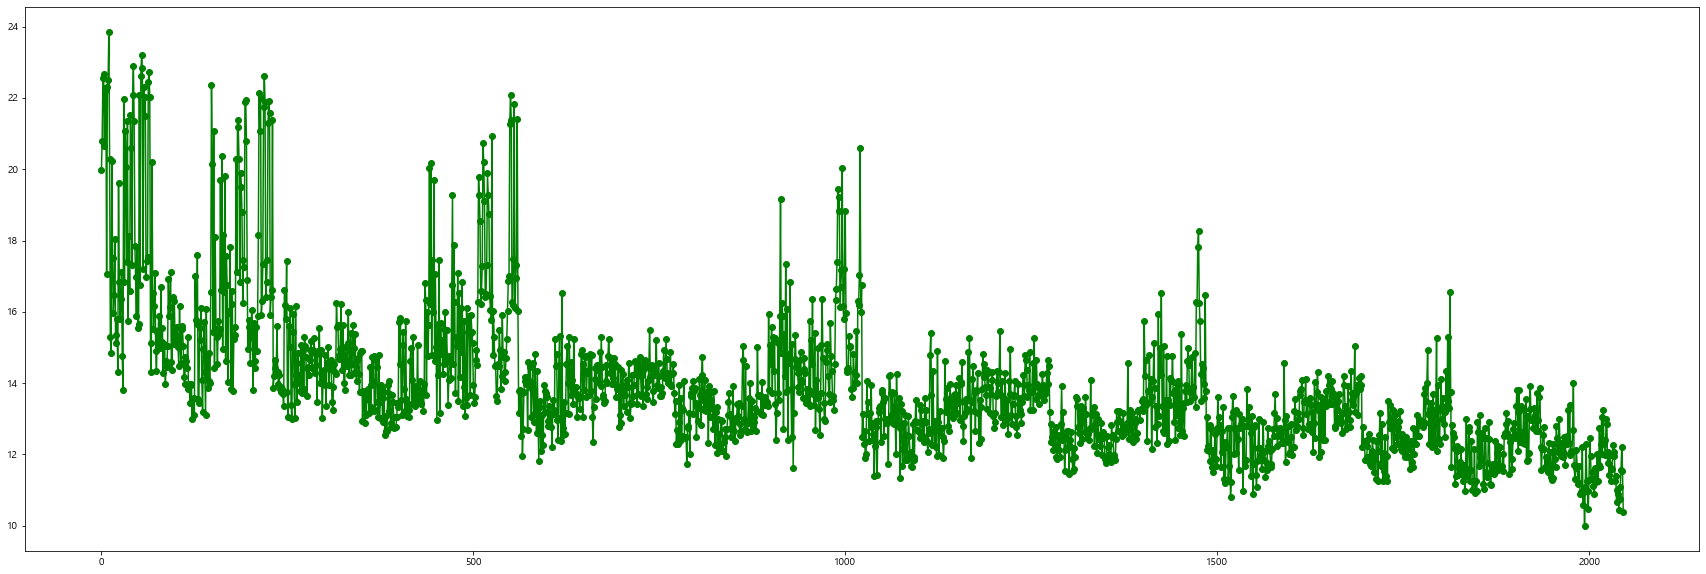

In [11]:
plt.figure(figsize=(30,10))
plt.plot(rmse_list,color='green',marker='o',linestyle='solid')
plt.show()

### 월별 카드 이용금액 예측
* 월별 카드 이용금액은 <br> 총 개설 카드 수, 실제 사용 카드 수, 신용카드 일시불 이용금액 합과 연관성이 높다.
* 평균점수, 총대출약정금액(mothly_lc), 총대출액(monthly_loan), 은행대출액(monthly_bk_loan),저축은행대출액(monthly_sbk_loan), 한도대출 총약정액(loan_commitment), 일시상환대출잔액(ls_rep_loanb), 담보대출총합(mortagage_loan)과 연관성이 적다(0.6이하)
* 하지만 연관성이 적은 컬럼중 두 개 이상이 결합되면 예측에 대한 오차가 작아진다.<br> 특히 신용점수와 결합할 경우 오차가 작아진다.

연관성이 낮은 칼럼들이 결합할 경우 오차가 대략 250000~650000 이다.

In [16]:
import itertools
lst = ['avg_score', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan', 'monthly_sbk_loan', 'loan_commitment', 'ls_rep_loanb', 'mortgage_loan']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)

In [22]:
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action='ignore')
rmse_list=[]

for i in range(len(combs)):
    y = data_by_loc['monthly_card_spend']
    X = data_by_loc[combs[i]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse_list.append( np.sqrt(mse) )

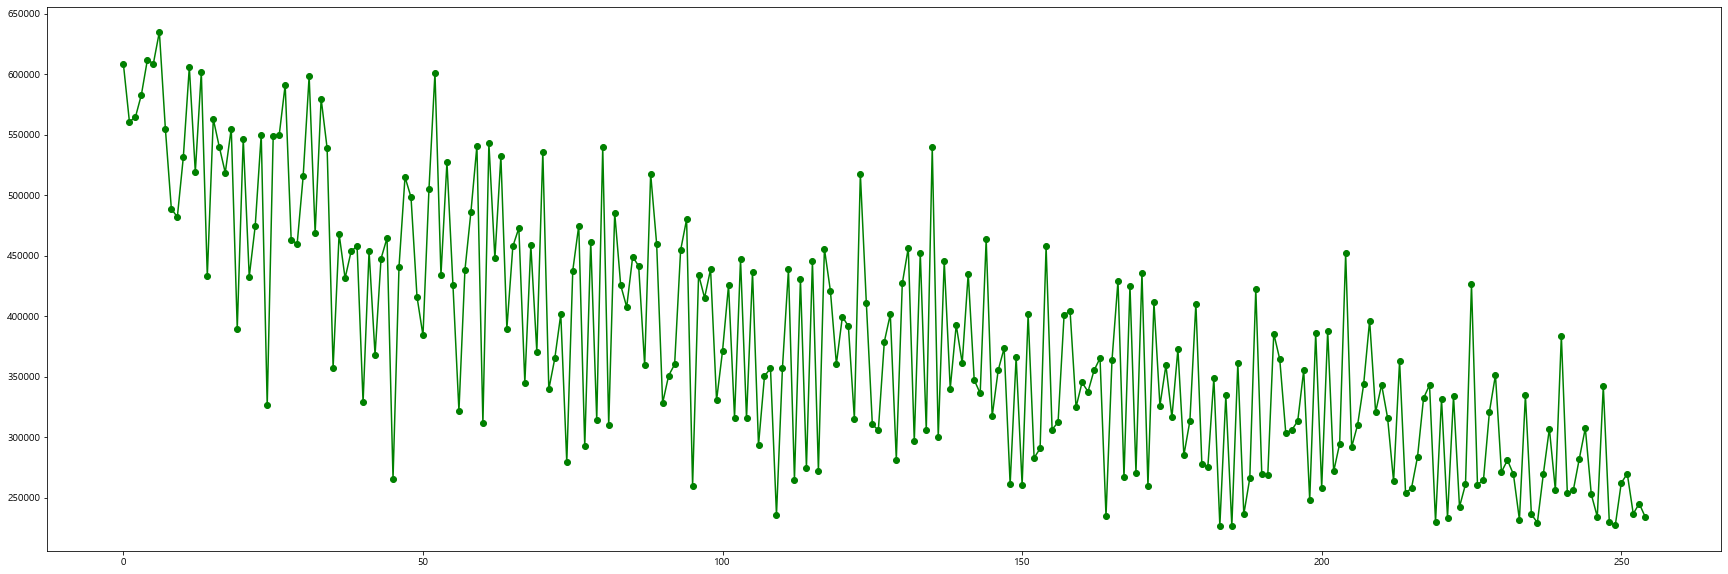

In [13]:
plt.figure(figsize=(30,10))
plt.plot(rmse_list,color='green',marker='o',linestyle='solid')
plt.show()

연관성이 높은 칼럼들이 결합할 경우 오차가 대략 160000~260000 이다.<br>
따라서 연관성이 낮은 칼럼들을 모두 결합하면, 연관성이 높은 칼럼 하나와 결합한 것과 비슷한 오차를 보인다.

In [6]:
import itertools
lst = ['num_opencard', 'num_usecard', 'monthly_cd_loan' ]
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)

In [7]:
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action='ignore')
rmse_list=[]

for i in range(len(combs)):
    y = data_by_loc['monthly_card_spend']
    X = data_by_loc[combs[i]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse_list.append( np.sqrt(mse) )
    print(combs[i], " mse: ", np.sqrt(mean_squared_error(y_test, predictions)) )

['num_opencard']  mse:  301130.5275343401
['num_usecard']  mse:  277447.7507510316
['monthly_cd_loan']  mse:  173548.48410349424
['num_opencard', 'num_usecard']  mse:  284121.0064864408
['num_opencard', 'monthly_cd_loan']  mse:  166232.6528882382
['num_usecard', 'monthly_cd_loan']  mse:  160724.14596050978
['num_opencard', 'num_usecard', 'monthly_cd_loan']  mse:  167638.94657831037


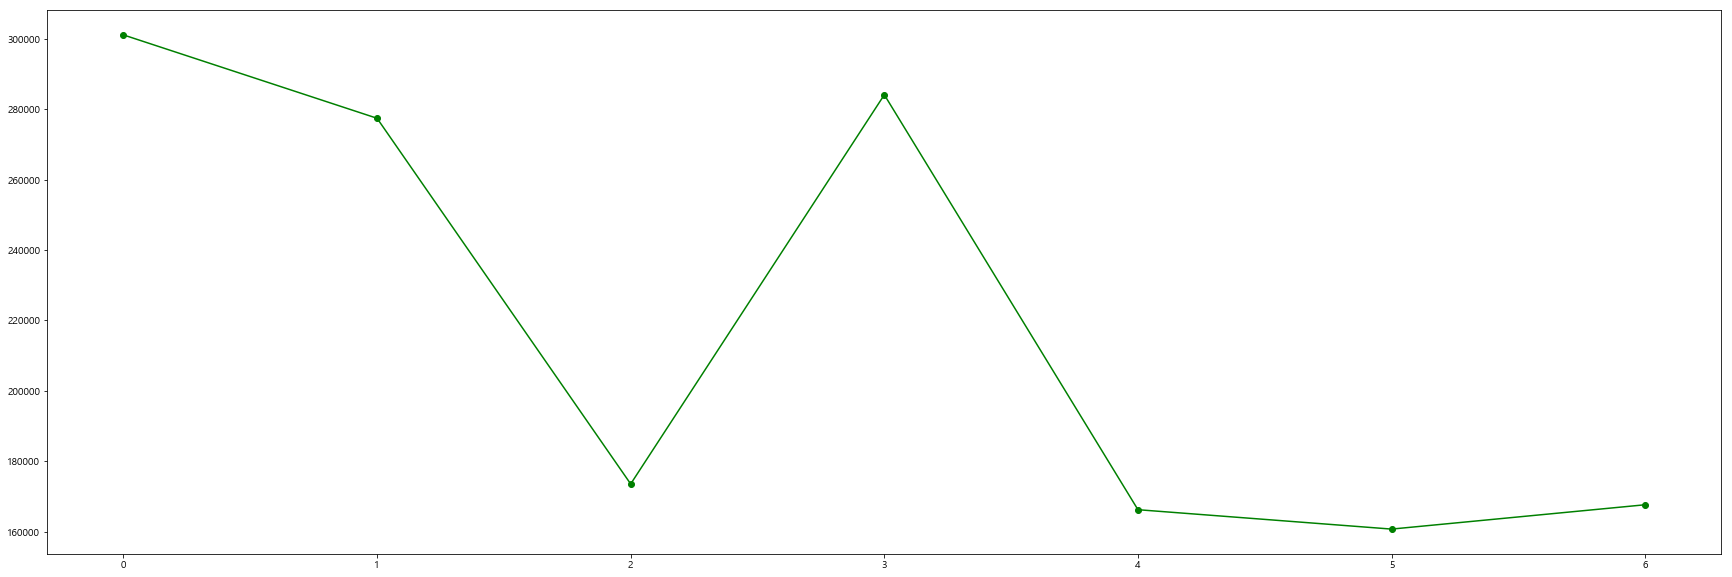

In [8]:
plt.figure(figsize=(30,10))
plt.plot(rmse_list,color='green',marker='o',linestyle='solid')
plt.show()

### 지역별 대출 업종 비교
색이 진할수록 대출금액이 크다

In [75]:
df3 = data_by_loc.groupby('city')[['monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan']].sum()
df3.columns = ['은행업종','카드업종','할부금융업종','보험업종','저축은행업종']
df3.head(12)

은행업종       카드업종     할부금융업종       보험업종     저축은행업종
city                                                         
강원     7329850000  122970000  622250000  206120000  170810000
경기    14034200000  172650000  521340000  511810000  204340000
경남     9180780000  140480000  542390000  357440000  171440000
경북     7860140000  125150000  514580000  240800000  175940000
광주     8450210000  150300000  475970000  243110000  171530000
대구     9932640000  153400000  467900000  456180000  170130000
대전     9481440000  170080000  468560000  341360000  198350000
부산     9975320000  185300000  481150000  506070000  201370000
서울    16725060000  181570000  398080000  475620000  195410000
울산     9933200000  154190000  569090000  561280000  172760000
인천    10465150000  185060000  532130000  469690000  193190000
전남     6310800000  119630000  526680000  155200000  160110000

In [70]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'skorea-provinces-geo-simple-by-parkheehyun.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [81]:
map = folium.Map(location=[35.842803, 128.18161], zoom_start=6, tiles='Stamen Toner')


map.choropleth(geo_data = geo_str,
                data = df3['은행업종'],
                columns = [df3.index, df3['은행업종']],
                fill_color = 'PuRd', #PuRd, YlGnBu
                key_on = 'feature.id')
map

In [80]:
map = folium.Map(location=[35.842803, 128.18161], zoom_start=6, tiles='Stamen Toner')


map.choropleth(geo_data = geo_str,
                data = df3['카드업종'],
                columns = [df3.index, df3['카드업종']],
                fill_color = 'PuRd', #PuRd, YlGnBu
                key_on = 'feature.id')
map

In [76]:
map = folium.Map(location=[35.842803, 128.18161], zoom_start=6, tiles='Stamen Toner')


map.choropleth(geo_data = geo_str,
                data = df3['할부금융업종'],
                columns = [df3.index, df3['할부금융업종']],
                fill_color = 'PuRd', #PuRd, YlGnBu
                key_on = 'feature.id')
map

In [77]:
map = folium.Map(location=[35.842803, 128.18161], zoom_start=6, tiles='Stamen Toner')


map.choropleth(geo_data = geo_str,
                data = df3['보험업종'],
                columns = [df3.index, df3['보험업종']],
                fill_color = 'PuRd', #PuRd, YlGnBu
                key_on = 'feature.id')
map

In [79]:
map = folium.Map(location=[35.842803, 128.18161], zoom_start=6, tiles='Stamen Toner')


map.choropleth(geo_data = geo_str,
                data = df3['저축은행업종'],
                columns = [df3.index, df3['저축은행업종']],
                fill_color = 'PuRd', #PuRd, YlGnBu
                key_on = 'feature.id')
map